In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('sales_data_sample.csv' , encoding="unicode_escape")

In [6]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [7]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [10]:
df_drop = ['ORDERNUMBER' , 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID' , 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE','TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',]

df.drop(df_drop , axis = 1 , inplace = True)

In [12]:
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTLINE,MSRP,PRODUCTCODE,POSTALCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Motorcycles,95,S10_1678,10022,USA,Small
1,34,81.35,5,2765.90,Motorcycles,95,S10_1678,51100,France,Small
2,41,94.74,2,3884.34,Motorcycles,95,S10_1678,75508,France,Medium
3,45,83.26,6,3746.70,Motorcycles,95,S10_1678,90003,USA,Medium
4,49,100.00,14,5205.27,Motorcycles,95,S10_1678,NaN,USA,Medium
...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,Ships,54,S72_3212,28034,Spain,Small
2819,29,100.00,1,3978.51,Ships,54,S72_3212,90110,Finland,Medium
2820,43,100.00,4,5417.57,Ships,54,S72_3212,28034,Spain,Medium
2821,34,62.24,1,2116.16,Ships,54,S72_3212,31000,France,Small


In [13]:
from sklearn.preprocessing import LabelEncoder

def convert_col(col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].values)

In [14]:
columns = ['PRODUCTLINE' , 'PRODUCTCODE' , 'COUNTRY' , 'DEALSIZE']
for col in columns:
    convert_col(col)

In [24]:
df.info()
df.drop(columns = ['POSTALCODE'] , axis = 1 , inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   PRODUCTLINE      2823 non-null   int32  
 5   MSRP             2823 non-null   int64  
 6   PRODUCTCODE      2823 non-null   int32  
 7   POSTALCODE       2747 non-null   object 
 8   COUNTRY          2823 non-null   int32  
 9   DEALSIZE         2823 non-null   int32  
dtypes: float64(2), int32(4), int64(3), object(1)
memory usage: 176.6+ KB


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(df)

In [26]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1 , 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)



C:\Users\ATHARVA\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ATHARVA\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ATHARVA\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ATHARVA\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

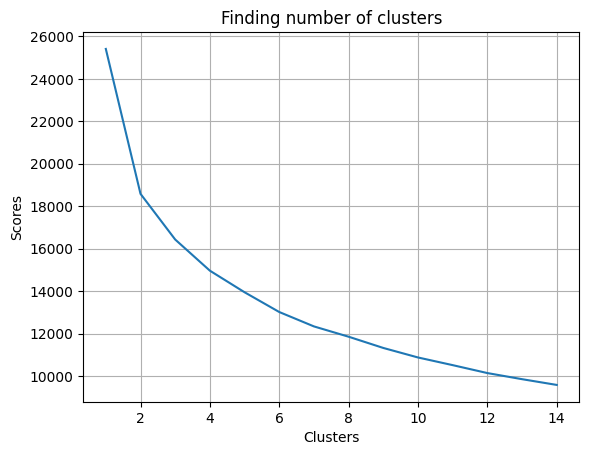

In [32]:
import matplotlib.pyplot as plt
k = list(range(1 , 15))
plt.plot(k , wcss)
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.title('Finding number of clusters')
plt.grid()
plt.show()
